### Mount Google Drive
The following code mounts your Google Drive to the Colab environment, allowing access to files stored in your Google Drive.

```python
from google.colab import drive
drive.mount('/content/drive')
```


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Loading and Preprocessing
This code loads images of selected celebrities from a specified directory, converts the images to grayscale, resizes them, and prepares the data for training a neural network.

```python
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

directory = "/content/drive/MyDrive/Colab Notebooks/Data/"
celebrities = ["Scarlett_Johansson", "Elizabeth_Olsen", "Christian_Bale", "Chris_Evans"]

data = []
labels = []

for i, celebrity in enumerate(celebrities):
    celebrity_dir = os.path.join(directory, celebrity)
    for h in range(1, 101):
        filename = f"IMG_{h}.jpg"
        if filename.endswith(".jpg"):
            file_path = os.path.join(celebrity_dir, filename)
            print(file_path)
            image = cv2.imread(file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            image = cv2.resize(image, (224, 224))  # Resize the image to a desired size
            data.append(image)
            labels.append(i)

data = np.array(data)
labels = np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.25
)

train_data = x_train.astype("float32") / 255.0
test_data = x_test.astype("float32") / 255.0

train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)
```


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

directory = "/content/drive/MyDrive/Colab Notebooks/Data/"
celebrities = ["Scarlett_Johansson", "Elizabeth_Olsen", "Christian_Bale", "Chris_Evans"]

data = []
labels = []

for i, celebrity in enumerate(celebrities):
    celebrity_dir = os.path.join(directory, celebrity)
    for h in range(1, 101):
        filename = f"IMG_{h}.jpg"
        if filename.endswith(".jpg"):
            file_path = os.path.join(celebrity_dir, filename)
            print(file_path)
            image = cv2.imread(file_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            image = cv2.resize(image, (224, 224))  # Resize the image to a desired size
            data.append(image)
            labels.append(i)

data = np.array(data)
labels = np.array(labels)
x_train, x_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.25
)

train_data = x_train.astype("float32") / 255.0
test_data = x_test.astype("float32") / 255.0

train_data = np.expand_dims(train_data, -1)
test_data = np.expand_dims(test_data, -1)

/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_1.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_2.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_3.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_4.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_5.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_6.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_7.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_8.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_9.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_10.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_11.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_12.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Scarlett_Johansson/IMG_13.jpg
/content/drive/MyDrive/Colab Notebooks/Data/Sca

### Model Building and Training
This code constructs a Convolutional Neural Network (CNN) using TensorFlow/Keras, trains it on the preprocessed data, and evaluates its performance on the test set.

```python
model = keras.Sequential(
    [
        keras.Input(shape=(224, 224, 1)),
        layers.Conv2D(16, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(24, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(4, activation="softmax"),
    ]
)

print(model.summary())

# Compile and train the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)
model.fit(train_data, y_train, batch_size=300, epochs=200, verbose=2)

# Evaluate the model on the test set
model.evaluate(test_data, y_test, batch_size=300, verbose=2)
```


In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(224, 224, 1)),
        layers.Conv2D(16, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(24, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPool2D(),
        layers.Flatten(),
        layers.Dense(4, activation="softmax"),
    ]
)

print(model.summary())

# Compile and train the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"],
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
)
model.fit(train_data, y_train, batch_size=300, epochs=200, verbose=2)

# Evaluate the model on the test set
model.evaluate(test_data, y_test, batch_size=300, verbose=2)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 24)      3480      
                                                                 
 conv2d_7 (Conv2D)           (None, 107, 107, 32)      6944      
                                                                 
 conv2d_8 (Conv2D)           (None, 105, 105, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 52, 52, 32)       0         
 2D)                                                  

[2.674661636352539, 0.7799999713897705]

### Prediction on a Test Image
This code loads a new image, preprocesses it, and predicts which celebrity is in the image using the trained model.

```python
from google.colab.patches import cv2_imshow
test_image_path = (
    directory+"Chris_Evans/IMG_105.jpg"  # Replace with the path to your test image
)
test_image = cv2.imread(test_image_path)
# cv2.imshow("Chris Evans",test_image)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
test_image = cv2.resize(
    test_image, (224, 224)
)  # Resize the image to match the model's input size
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image.astype("float32") / 255.0  # Normalize pixel values

# Make predictions on the test image
predictions = model.predict(test_image)
predicted_celebrity = celebrities[np.argmax(predictions[0])]
cv2_imshow(cv2.imread(test_image_path))
print("Predicted celebrity:", predicted_celebrity)
```


1/1 [==============================] - 0s 21ms/step


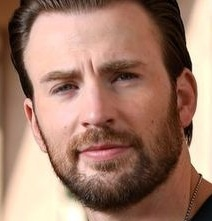

Predicted celebrity: Chris_Evans


In [ ]:
from google.colab.patches import cv2_imshow
test_image_path = (
    directory+"Chris_Evans/IMG_105.jpg"  # Replace with the path to your test image
)
test_image = cv2.imread(test_image_path)
# cv2.imshow("Chris Evans",test_image)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
test_image = cv2.resize(
    test_image, (224, 224)
)  # Resize the image to match the model's input size
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension
test_image = test_image.astype("float32") / 255.0  # Normalize pixel values

# Make predictions on the test image
predictions = model.predict(test_image)
predicted_celebrity = celebrities[np.argmax(predictions[0])]
cv2_imshow(cv2.imread(test_image_path))
print("Predicted celebrity:", predicted_celebrity)